## Libraries

In [1]:
import tensorflow as tf

import numpy as np 
import matplotlib.pyplot as plt 

## Images 

Each image is a 28 by 28 grayscale image of a handwritten digit. 

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step


In [96]:
x_train.shape

(60000, 28, 28)

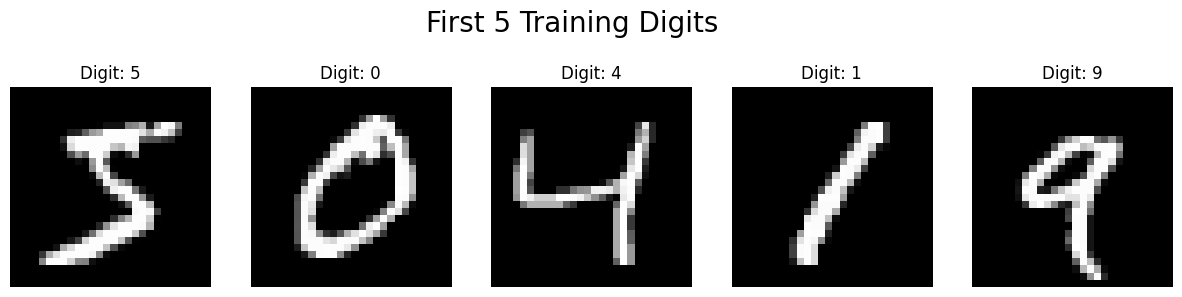

In [97]:
fig, ax = plt.subplots(figsize=(15, 5), ncols=5)
fig.suptitle('First 5 Training Digits', fontsize=20, y=0.85)
for i in range(5): 
    ax[i].set_axis_off()
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].set_title('Digit: ' + str(y_train[i]))
plt.show()

## Neural Network

My first model will be a simple sequential model with dense layers. 

In [98]:
simple_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'), 
    tf.keras.layers.Dense(units=10) 
])

In [99]:
simple_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
    metrics=['accuracy']
)

In [100]:
history = simple_model.fit(x_train, y_train, batch_size=15, epochs=15, validation_split=0.1, verbose=2)

Epoch 1/15
3600/3600 - 12s - 3ms/step - accuracy: 0.9325 - loss: 0.2250 - val_accuracy: 0.9632 - val_loss: 0.1262
Epoch 2/15
3600/3600 - 20s - 6ms/step - accuracy: 0.9675 - loss: 0.1069 - val_accuracy: 0.9697 - val_loss: 0.0959
Epoch 3/15
3600/3600 - 19s - 5ms/step - accuracy: 0.9763 - loss: 0.0777 - val_accuracy: 0.9718 - val_loss: 0.0941
Epoch 4/15
3600/3600 - 21s - 6ms/step - accuracy: 0.9805 - loss: 0.0627 - val_accuracy: 0.9783 - val_loss: 0.0786
Epoch 5/15
3600/3600 - 14s - 4ms/step - accuracy: 0.9847 - loss: 0.0517 - val_accuracy: 0.9745 - val_loss: 0.0924
Epoch 6/15
3600/3600 - 13s - 4ms/step - accuracy: 0.9868 - loss: 0.0424 - val_accuracy: 0.9763 - val_loss: 0.0926
Epoch 7/15
3600/3600 - 13s - 4ms/step - accuracy: 0.9880 - loss: 0.0379 - val_accuracy: 0.9775 - val_loss: 0.0906
Epoch 8/15
3600/3600 - 13s - 4ms/step - accuracy: 0.9888 - loss: 0.0355 - val_accuracy: 0.9777 - val_loss: 0.0941
Epoch 9/15
3600/3600 - 12s - 3ms/step - accuracy: 0.9913 - loss: 0.0289 - val_accuracy: 

The training accuracy is higher than validaiton accuracy after around 3 epochs.

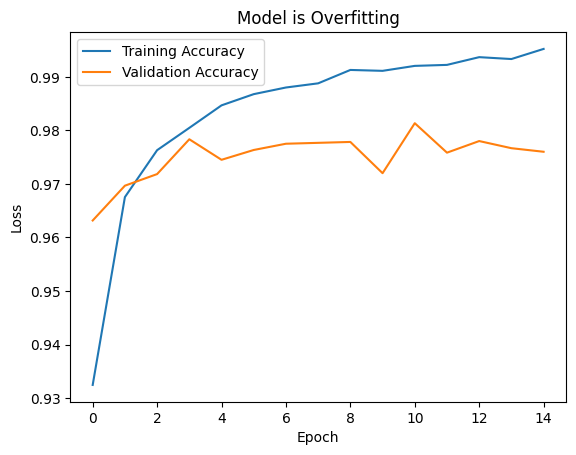

In [101]:
plt.title('Model is Overfitting')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Attempt 2

To help with overfitting, I am removeing units from dense layers, removing a dense layers, adding dropout layers, and decreasing the learning rate. I also altered the batch size and number of epochs to see what worked well. 

In [102]:
simple_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=32, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=10) 
])

simple_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
    metrics=['accuracy']
)

In [107]:
history = simple_model.fit(x_train, y_train, batch_size=10, epochs=20, validation_split=0.1, verbose=2)

Epoch 1/20
5400/5400 - 14s - 3ms/step - accuracy: 0.9583 - loss: 0.1371 - val_accuracy: 0.9793 - val_loss: 0.0745
Epoch 2/20
5400/5400 - 15s - 3ms/step - accuracy: 0.9610 - loss: 0.1291 - val_accuracy: 0.9775 - val_loss: 0.0762
Epoch 3/20
5400/5400 - 12s - 2ms/step - accuracy: 0.9624 - loss: 0.1213 - val_accuracy: 0.9807 - val_loss: 0.0728
Epoch 4/20
5400/5400 - 9s - 2ms/step - accuracy: 0.9654 - loss: 0.1150 - val_accuracy: 0.9790 - val_loss: 0.0705
Epoch 5/20
5400/5400 - 10s - 2ms/step - accuracy: 0.9676 - loss: 0.1065 - val_accuracy: 0.9788 - val_loss: 0.0708
Epoch 6/20
5400/5400 - 10s - 2ms/step - accuracy: 0.9680 - loss: 0.1039 - val_accuracy: 0.9795 - val_loss: 0.0702
Epoch 7/20
5400/5400 - 10s - 2ms/step - accuracy: 0.9689 - loss: 0.0998 - val_accuracy: 0.9792 - val_loss: 0.0691
Epoch 8/20
5400/5400 - 11s - 2ms/step - accuracy: 0.9698 - loss: 0.0957 - val_accuracy: 0.9802 - val_loss: 0.0702
Epoch 9/20
5400/5400 - 13s - 2ms/step - accuracy: 0.9720 - loss: 0.0909 - val_accuracy: 0

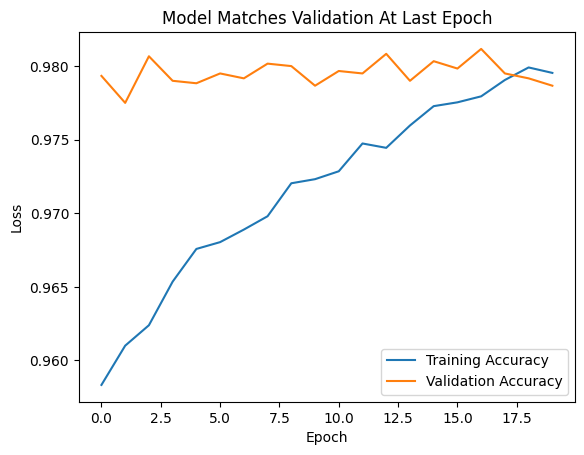

In [108]:
plt.title('Model Matches Validation At Last Epoch')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing the Model

Fitting on all data and evaluatin with test data.

In [111]:
simple_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=32, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=10) 
])

simple_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
    metrics=['accuracy']
)

simple_model.fit(x_train, y_train, batch_size=10, epochs=20, verbose=2)

Epoch 1/20
6000/6000 - 10s - 2ms/step - accuracy: 0.7950 - loss: 0.6893
Epoch 2/20
6000/6000 - 15s - 2ms/step - accuracy: 0.9012 - loss: 0.3352
Epoch 3/20
6000/6000 - 18s - 3ms/step - accuracy: 0.9222 - loss: 0.2675
Epoch 4/20
6000/6000 - 17s - 3ms/step - accuracy: 0.9339 - loss: 0.2247
Epoch 5/20
6000/6000 - 17s - 3ms/step - accuracy: 0.9399 - loss: 0.1998
Epoch 6/20
6000/6000 - 19s - 3ms/step - accuracy: 0.9472 - loss: 0.1762
Epoch 7/20
6000/6000 - 18s - 3ms/step - accuracy: 0.9518 - loss: 0.1621
Epoch 8/20
6000/6000 - 20s - 3ms/step - accuracy: 0.9551 - loss: 0.1496
Epoch 9/20
6000/6000 - 12s - 2ms/step - accuracy: 0.9571 - loss: 0.1411
Epoch 10/20
6000/6000 - 19s - 3ms/step - accuracy: 0.9613 - loss: 0.1307
Epoch 11/20
6000/6000 - 20s - 3ms/step - accuracy: 0.9623 - loss: 0.1251
Epoch 12/20
6000/6000 - 20s - 3ms/step - accuracy: 0.9643 - loss: 0.1163
Epoch 13/20
6000/6000 - 19s - 3ms/step - accuracy: 0.9658 - loss: 0.1107
Epoch 14/20
6000/6000 - 19s - 3ms/step - accuracy: 0.9676 - 

Final acuracy around 97%

In [112]:
simple_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9698 - loss: 0.0943


[0.08276581764221191, 0.9742000102996826]